<a href="https://colab.research.google.com/github/bellune/TP2_fouille_donnees/blob/main/notebookpenda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import files
uploaded = files.upload()


Saving winequality.csv to winequality.csv


In [3]:
df = pd.read_csv("winequality.csv", sep=';')
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [5]:
df['type'].value_counts()


,count
type,
white,4898
red,1599


In [6]:
df['type_num'] = df['type'].map({'red': 0, 'white': 1})
df[['type', 'type_num']].head()


,type,type_num
0,red,0
1,red,0
2,red,0
3,red,0
4,red,0


In [7]:
X = df[['total sulfur dioxide']]
y = df['type_num']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

In [8]:
logreg_q3 = LogisticRegression()
logreg_q3.fit(X_train, y_train)

y_pred = logreg_q3.predict(X_test)
acc_q3 = accuracy_score(y_test, y_pred)
acc_q3


0.9256410256410257

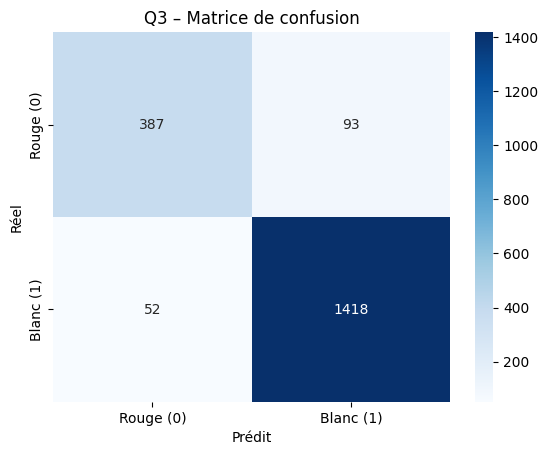

In [9]:
cm_q3 = confusion_matrix(y_test, y_pred)

sns.heatmap(cm_q3, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Rouge (0)', 'Blanc (1)'],
            yticklabels=['Rouge (0)', 'Blanc (1)'])
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Q3 – Matrice de confusion")
plt.show()

In [10]:
coef_q3 = logreg_q3.coef_[0][0]
intercept_q3 = logreg_q3.intercept_[0]
odds_ratio_q3 = np.exp(coef_q3)

coef_q3, odds_ratio_q3

(np.float64(0.06425045324830687), np.float64(1.06635943850486))

In [11]:
df['good'] = (df['quality'] >= 7).astype(int)
df['good'].value_counts()

,count
good,
0,5220
1,1277


In [12]:
X = df[['sulphates', 'volatile acidity', 'pH']]
y = df['good']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

In [13]:
logreg_q4 = LogisticRegression(max_iter=1000)
logreg_q4.fit(X_train, y_train)

y_pred = logreg_q4.predict(X_test)

print("Accuracy Q4 :", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Q4 : 0.8035897435897436
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1567
           1       0.00      0.00      0.00       383

    accuracy                           0.80      1950
   macro avg       0.40      0.50      0.45      1950
weighted avg       0.65      0.80      0.72      1950



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


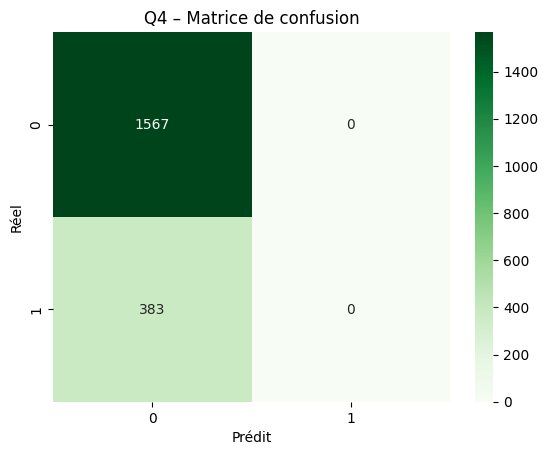

In [14]:
cm_q4 = confusion_matrix(y_test, y_pred)

sns.heatmap(cm_q4, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Q4 – Matrice de confusion")
plt.show()

In [15]:
for var, coef in zip(X.columns, logreg_q4.coef_[0]):
    print(f"{var:20s} coef = {coef:.4f} | odds ratio = {np.exp(coef):.4f}")

sulphates            coef = 1.1726 | odds ratio = 3.2303
volatile acidity     coef = -3.2166 | odds ratio = 0.0401
pH                   coef = 0.8794 | odds ratio = 2.4094


In [16]:
major_class = y_train.value_counts().idxmax()
y_naive = np.full_like(y_test, fill_value=major_class)

print("Classe majoritaire :", major_class)
print("Accuracy naïf :", accuracy_score(y_test, y_naive))
print(confusion_matrix(y_test, y_naive))

Classe majoritaire : 0
Accuracy naïf : 0.8035897435897436
[[1567    0]
 [ 383    0]]
